## Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras
from keras.layers import Dense,Input
from keras.models import Model,Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Allow authorization for the drive mount



In [ ]:
#Load X data
x=pd.read_csv('/content/drive/MyDrive/data/xdata.csv')
# eg: pd.read_csv('/content/drive/MyDrive/workshop/xdata.csv')

x.shape

(4050, 25)

In [ ]:
# Load Y data
y=pd.read_csv('/content/drive/MyDrive/data/ydata.csv')
y.shape


(4050, 24)

## Data Preprocessing

In [ ]:
x.sample(5)  # shows random 5 records

,Temperature,H2,H2O,CO,CO2,CH2O,CH4,CH3OH,C2H2,CH3CHO,...,A2-C10H8,A1OH-C6H6O,C5H4O2,C2H2O2,HAA-C2H4O2,XYLOSE-C5H8O,C11H12O4,C8H10O3,C2H5OH,HCOOH
100,1073.0,0.00023,0.07031,0.08784,0.12458,0.07034,0.00315,0.06433,0.0,0.01529,...,0.0,0.00147,0.0,0.02675,0.07918,0.05277,0.02709,0.0,0.00962,0.00766
2688,1223.0,0.00017,0.29720,0.04701,0.08836,0.04950,0.00181,0.02649,0.0,0.00973,...,0.0,0.00063,0.0,0.01948,0.05848,0.05794,0.03843,0.0,0.00678,0.00526
671,1073.0,0.00041,0.06890,0.03518,0.07311,0.04863,0.00000,0.01945,0.0,0.01783,...,0.0,0.00000,0.0,0.04701,0.10942,0.00000,0.00000,0.0,0.00000,0.00373
3542,1273.0,0.00026,0.06649,0.08330,0.12703,0.06928,0.00381,0.06224,0.0,0.01485,...,0.0,0.00106,0.0,0.02680,0.07941,0.05935,0.02404,0.0,0.00958,0.00745
1303,1123.0,0.00023,0.06682,0.07604,0.10620,0.05881,0.00363,0.05450,0.0,0.01299,...,0.0,0.00202,0.0,0.02320,0.07412,0.08448,0.03389,0.0,0.00761,0.00689


In [ ]:
y.sample(5)

,H2,H2O,CO,CO2,CH2O,CH4,CH3OH,C2H2,CH3CHO,C2H4,...,A2-C10H8,A1OH-C6H6O,C5H4O2,C2H2O2,HAA-C2H4O2,XYLOSE-C5H8O,C11H12O4,C8H10O3,C2H5OH,HCOOH
315,0.010974,0.243230,0.261409,0.115248,0.085338,0.011608,0.030086,0.000399,1.216406e-03,0.009625,...,0.000986,0.000792,0.136982,4.530644e-09,1.654949e-04,0.009591,0.018378,0.002335,4.368753e-07,0.006328
167,0.002040,0.486824,0.120538,0.020798,0.062773,0.008218,0.033341,0.000875,1.104766e-03,0.038639,...,0.014928,0.012045,0.036087,6.135036e-10,5.821084e-05,0.001937,0.091593,0.005229,1.011496e-06,0.005151
3851,0.024427,0.169177,0.509382,0.067210,0.004416,0.016992,0.000449,0.002961,3.802570e-10,0.001145,...,0.000000,0.000002,0.098081,1.725158e-13,4.005568e-08,0.000000,0.000000,0.000000,3.432626e-09,0.002476
2151,0.016526,0.136783,0.379982,0.110777,0.039288,0.017651,0.014462,0.003438,6.731196e-09,0.014960,...,0.001936,0.000220,0.115230,5.000241e-11,7.387389e-06,0.000000,0.017729,0.051154,6.666975e-08,0.007241
2725,0.018664,0.253263,0.395337,0.122135,0.013256,0.016725,0.007588,0.001889,2.249733e-09,0.006515,...,0.000821,0.000064,0.078340,2.943482e-12,5.106203e-07,0.000000,0.000026,0.017492,3.619351e-08,0.005767


### Splitting of data

In [ ]:
from sklearn.model_selection import train_test_split

# test_size = ?/4050, random_state = Any integer
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=(810/4050) , random_state=22 )

In [ ]:
print(X_train.shape,Y_train.shape)
print(X_test.shape, Y_test.shape)

(3240, 25) (3240, 24)
(810, 25) (810, 24)


In [ ]:
# test_size = ?/3240, random_state = Any integer
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=(810/3240) , random_state=22)

In [ ]:
print(X_train.shape,Y_train.shape)
print(X_val.shape, Y_val.shape)

(2430, 25) (2430, 24)
(810, 25) (810, 24)


### Data Scaling

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

$ z = \frac{x-μ}{σ} $

In [ ]:
## Now we need to do scale the data to get into same range
ss_x=StandardScaler()       # object for scaler class
ss_y=StandardScaler()       # object for scaler class

In [ ]:
# fit unscaled data and transform into scaled
xtrain_sc=ss_x.fit_transform(X_train)
ytrain_sc=ss_y.fit_transform(Y_train)

In [ ]:
# now using same parameters(we got on fitting), just transform the test and val set also into scaled data
xtest_sc=ss_x.transform(X_test)
ytest_sc=ss_y.transform(Y_test)

xval_sc=ss_x.transform(X_val)
yval_sc=ss_y.transform(Y_val)

## Build Model

Keras documentation- https://www.tensorflow.org/api_docs/python/tf/keras

Dense documentation- https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

In [ ]:
model1=Sequential([
       # activation function types- 'sigmoid', 'tanh', 'relu', 'linear'
       Dense(64,input_shape=(25,),activation='relu'),  #hidden layer with 64 nodes
       Dense(32,activation='relu'),                    # Hidden layer2 with 32 nodes

       Dense(24,activation='linear')                         # Output layer
])



## Now create a similar ANN model named "model2" with the following dense configuration:
## 25 (input) --> 64 --> 32 --> 24 --> 16 --> 24 (output) with relu activation







In [ ]:
## code cell for model2

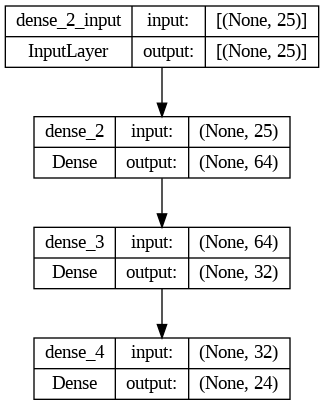

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model1, show_shapes=True, show_layer_names=True)

##Training

### Model 1

model.compile documentation- https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile

model.fit documentation- https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit

In [ ]:
# Fill loss function, type of optimizer, metrics
# eg: loss= "mean_squared_error" , optimizer="adam", metrics=["mean_absolute_error"]
model1.compile(loss='mean_squared_error' , optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
# Enter number of epochs and batch_size
r1=model1.fit(xtrain_sc,ytrain_sc,validation_data=(xval_sc,yval_sc),epochs=200 ,batch_size=64)

Epoch 1/200
38/38 [==============================] - 1s 7ms/step - loss: 0.8687 - mean_absolute_error: 0.6616 - val_loss: 0.6597 - val_mean_absolute_error: 0.5694
Epoch 2/200
38/38 [==============================] - 0s 3ms/step - loss: 0.5543 - mean_absolute_error: 0.5043 - val_loss: 0.4168 - val_mean_absolute_error: 0.4218
Epoch 3/200
38/38 [==============================] - 0s 3ms/step - loss: 0.3655 - mean_absolute_error: 0.3858 - val_loss: 0.3049 - val_mean_absolute_error: 0.3471
Epoch 4/200
38/38 [==============================] - 0s 3ms/step - loss: 0.2903 - mean_absolute_error: 0.3360 - val_loss: 0.2588 - val_mean_absolute_error: 0.3145
Epoch 5/200
38/38 [==============================] - 0s 3ms/step - loss: 0.2537 - mean_absolute_error: 0.3099 - val_loss: 0.2298 - val_mean_absolute_error: 0.2902
Epoch 6/200
38/38 [==============================] - 0s 3ms/step - loss: 0.2215 - mean_absolute_error: 0.2852 - val_loss: 0.2003 - val_mean_absolute_error: 0.2675
Epoch 7/200
38/38 [===

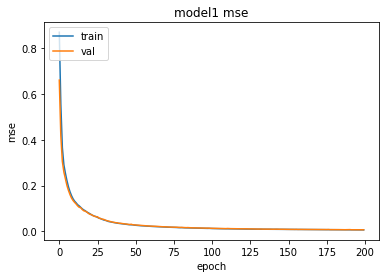

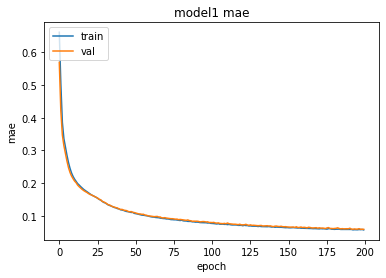

In [ ]:
# summarize history for loss=mse
plt.plot(r1.history['loss'])
plt.plot(r1.history['val_loss'])
plt.title('model1 mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for mae
plt.plot(r1.history['mean_absolute_error'])
plt.plot(r1.history['val_mean_absolute_error'])
plt.title('model1 mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Model 2

In [ ]:
model2.compile(loss= '' , optimizer='', metrics=[''])

In [ ]:
# Enter number of epochs and batch_size
r2=model2.fit(xtrain_sc,ytrain_sc,validation_data=(xval_sc,yval_sc), epochs= ,batch_size= )

In [ ]:
# summarize history for loss=mse
plt.plot(r2.history['loss'])
plt.plot(r2.history['val_loss'])
plt.title('model2 mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for mae
plt.plot(r2.history['mean_absolute_error'])
plt.plot(r2.history['val_mean_absolute_error'])
plt.title('model2 mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Model Evaluation

### Prediction

In [ ]:
def prediction(model,x):
  p=model.predict(x)
  testp=ss_y.inverse_transform(p.reshape(-1,p.shape[-1])).reshape(p.shape)
  return testp

In [ ]:
#prediction on test set
testp1=prediction(model1,xtest_sc)
# testp2=prediction(model2,xtest_sc)


#prediction on train set
trainp1=prediction(model1,xtrain_sc)
# trainp2=prediction(model2,xtrain_sc)


76/76 [==============================] - 0s 1ms/step


In [ ]:
testp1[testp1<0]=0
#testp2[testp2<0]=0

trainp1[trainp1<0]=0
#trainp2[trainp2<0]=0

Testing R2 score

In [ ]:
print('Test R2 Score')
print('R2 score of model 1 is',r2_score(Y_test.values,testp1))
# print('R2 score of model 2 is',r2_score(Y_test.values,testp2))


Test R2 Score
R2 score of model 1 is 0.993340446453027



Training R2 score

In [ ]:
print('Train R2 Score')
print('R2 score of model 1 is',r2_score(Y_train.values,trainp1))
# print('R2 score of model 2 is',r2_score(Y_train.values,trainp2))


Train R2 Score
R2 score of model 1 is 0.9942203633783834


In [ ]:
from sklearn.metrics import mean_squared_error

TEST MSE

In [ ]:
print('Test MSE')
print('MSE of model 1 is',mean_squared_error(testp1,Y_test.values))
# print('MSE of model 2 is',mean_squared_error(testp2,Y_test.values))


Test MSE
MSE of model 1 is 5.41719834551961e-06


TRAIN MSE

In [ ]:
print('Train MSE')
print('MSE of model 1 is',mean_squared_error(trainp1,Y_train.values))
# print('MSE of model 2 is',mean_squared_error(trainp2,Y_train.values))


Train MSE
MSE of model 1 is 5.122316670547864e-06


### Results visualization

In [ ]:
Y_test.head()

,H2,H2O,CO,CO2,CH2O,CH4,CH3OH,C2H2,CH3CHO,C2H4,...,A2-C10H8,A1OH-C6H6O,C5H4O2,C2H2O2,HAA-C2H4O2,XYLOSE-C5H8O,C11H12O4,C8H10O3,C2H5OH,HCOOH
1687,0.009728,0.363933,0.250906,0.091320,0.056864,0.014089,0.032270,0.001726,9.939312e-10,0.013876,...,0.001588,0.000016,0.084749,2.221938e-11,1.393632e-05,0.000000,4.502497e-03,0.011790,1.433012e-07,0.006497
1602,0.011835,0.135330,0.299703,0.096703,0.083302,0.013103,0.031377,0.002453,1.982429e-07,0.015509,...,0.002086,0.000496,0.140550,1.048895e-10,5.410996e-05,0.000006,6.836373e-02,0.023533,9.726626e-08,0.007121
1016,0.004237,0.335313,0.215535,0.026789,0.064234,0.012882,0.051792,0.002668,2.614184e-07,0.044304,...,0.021473,0.004409,0.041431,1.258891e-10,2.952060e-05,0.000001,7.139040e-02,0.019397,6.167384e-07,0.006605
3345,0.020778,0.270485,0.467503,0.121633,0.000242,0.022246,0.000096,0.010144,9.444785e-10,0.002989,...,0.001402,0.000256,0.003350,0.000000e+00,1.126319e-10,0.000000,1.775436e-14,0.016191,1.331025e-08,0.004258
407,0.006138,0.371847,0.208451,0.082085,0.072014,0.012210,0.046839,0.000385,1.614246e-03,0.014255,...,0.002217,0.001794,0.081264,1.900527e-09,9.214573e-05,0.004294,2.797550e-02,0.002541,4.466846e-07,0.007105


In [ ]:
reacx = ['Temperature','H2', 'H2O', 'CO', 'CO2', 'CH2O', 'CH4', 'CH3OH', 'C2H2', 'CH3CHO',
       'C2H4', 'C2H6', 'CH3COCH3', 'A1-C6H6', 'C5H6', 'A2-C10H8', 'A1OH-C6H6O', 'C5H4O2', 'C2H2O2', 'HAA-C2H4O2',
       'XYLOSE-C5H8O', 'C11H12O4', 'C8H10O3','C2H5OH',
       'HCOOH']

In [ ]:
testp2_df=pd.DataFrame(testp1,columns=reacx[1:])
testp2_df.head()

,H2,H2O,CO,CO2,CH2O,CH4,CH3OH,C2H2,CH3CHO,C2H4,...,A2-C10H8,A1OH-C6H6O,C5H4O2,C2H2O2,HAA-C2H4O2,XYLOSE-C5H8O,C11H12O4,C8H10O3,C2H5OH,HCOOH
0,0.009907,0.370838,0.247829,0.094328,0.054554,0.014019,0.030974,0.001817,0.000000,0.012514,...,0.002737,0.000236,0.087914,2.438006e-10,0.000022,0.000036,0.004670,0.009222,5.018628e-08,0.006377
1,0.011768,0.130982,0.301287,0.102744,0.084821,0.013281,0.028972,0.002430,0.000000,0.015113,...,0.002220,0.000319,0.138489,0.000000e+00,0.000058,0.000265,0.073609,0.019030,7.798605e-08,0.007181
2,0.003513,0.336231,0.207804,0.030469,0.068078,0.011678,0.053337,0.004032,0.000000,0.046903,...,0.020893,0.003383,0.042211,0.000000e+00,0.000034,0.000000,0.071270,0.018305,6.542135e-07,0.006773
3,0.020605,0.271115,0.461439,0.121857,0.000000,0.021159,0.000944,0.009789,0.000000,0.003714,...,0.000804,0.000000,0.014149,0.000000e+00,0.000003,0.000237,0.001264,0.016579,4.949053e-08,0.004426
4,0.006139,0.367613,0.214180,0.084641,0.074698,0.012769,0.046683,0.000000,0.001586,0.012755,...,0.002048,0.001461,0.081589,1.802842e-09,0.000102,0.004358,0.029948,0.000000,4.483429e-07,0.006995


In [ ]:
def pp_species(p):
  for sp in range(Y_test.values.shape[1]):
    axes = plt.gca()
    x_vals = np.linspace(np.min(p[:,sp].flatten()), np.max(Y_test.values[:,sp].flatten()), 100)
    plt.plot(x_vals, x_vals,'--', c='blue', linewidth=1)
    plt.scatter(p[:,sp].flatten(),Y_test.values[:,sp].flatten(),c='red',s=2)
    plt.xlabel('Predicted Value')
    plt.ylabel('Actual Value')
    plt.title('{} : R2 score = {}'.format(reacx[sp+1],r2_score(Y_test.values[:,sp],p[:,sp])))

    plt.tight_layout()

    plt.show()

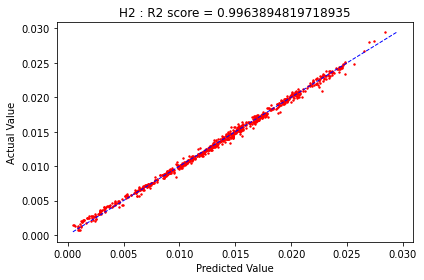

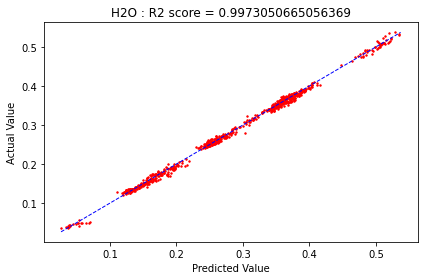

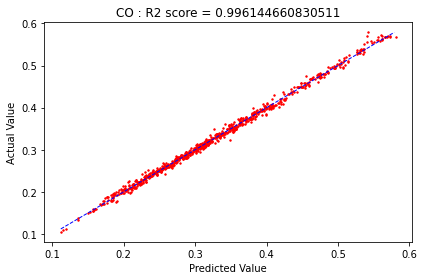

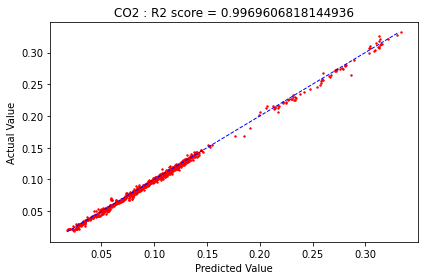

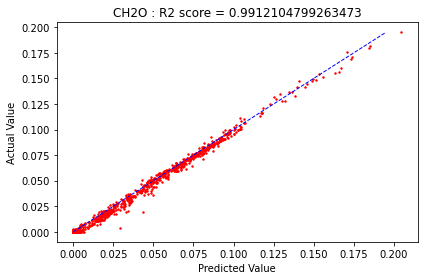

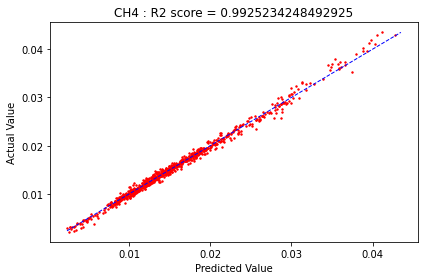

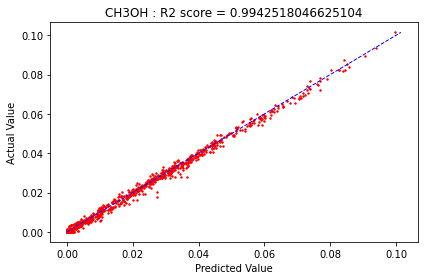

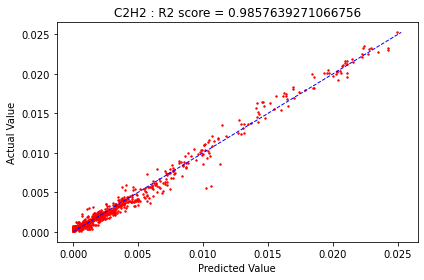

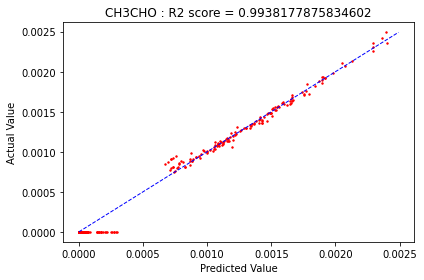

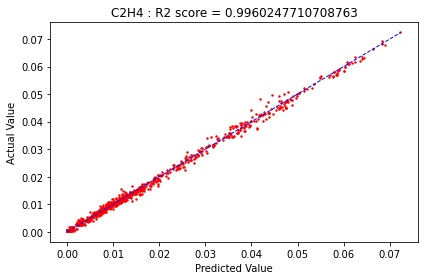

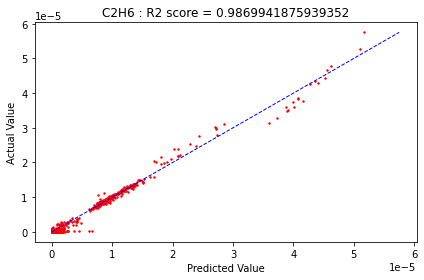

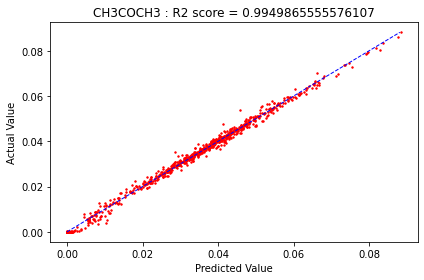

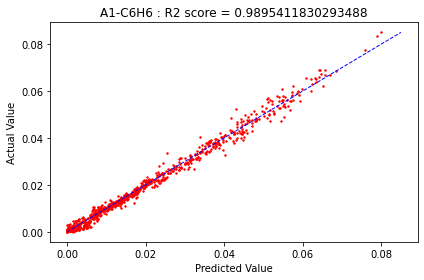

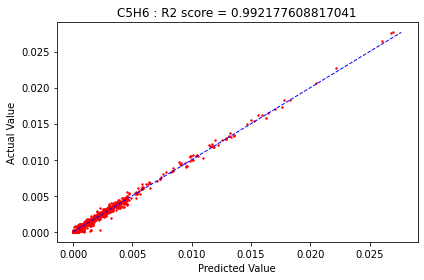

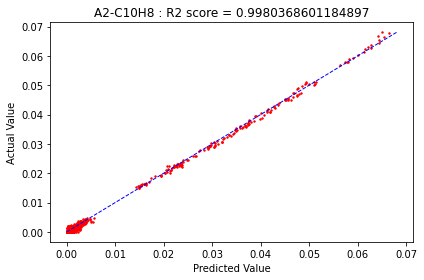

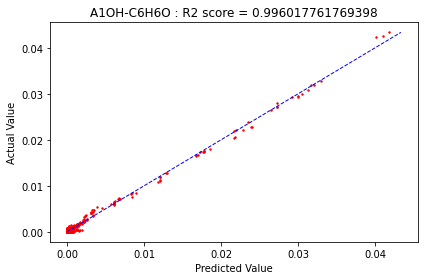

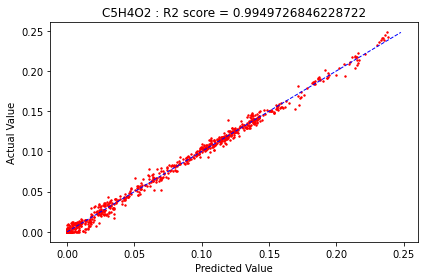

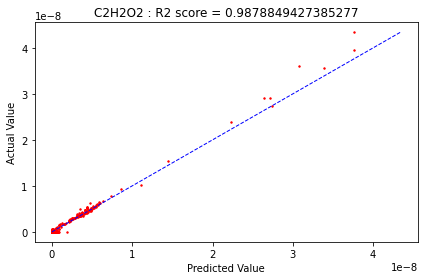

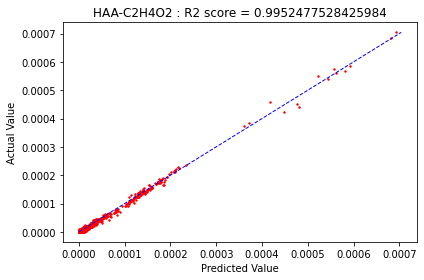

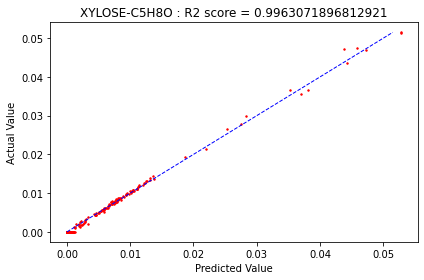

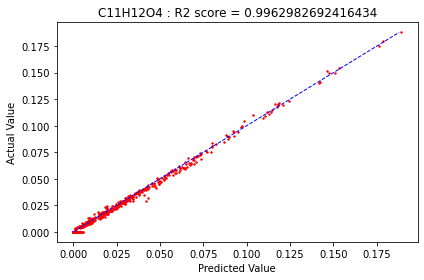

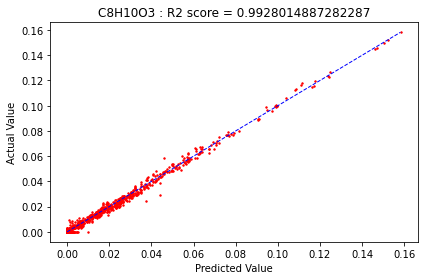

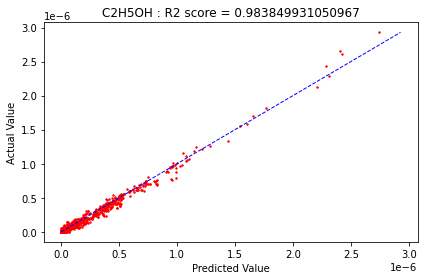

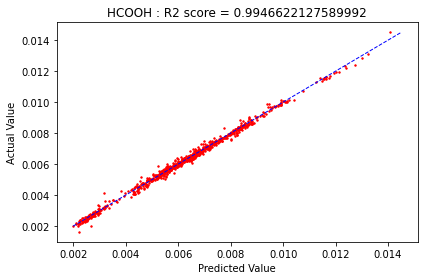

In [ ]:
pp_species(testp1)

In [ ]:
def parity_plot(p):
  axes = plt.gca()
  x_vals = np.linspace(np.min(p.flatten()), np.max(Y_test.values.flatten()), 100)
  plt.plot(x_vals, x_vals,'--', c='blue', linewidth=1)
  plt.scatter(p.flatten(),Y_test.values.flatten(),c='orange',s=2)
  plt.xlabel('Predicted Value')
  plt.ylabel('Actual Value')
  plt.title('r2 score = {}'.format(r2_score(Y_test.values,p)))
  plt.tight_layout()

  plt.show()

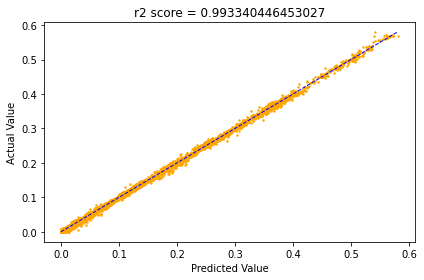

In [ ]:
parity_plot(testp1)

In [ ]:
#parity_plot(testp2)